In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

(641, 960, 3)
(800, 1500, 3)


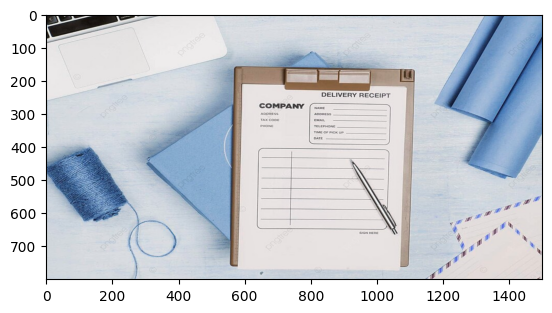

In [2]:
im_path ="./bill7.jpg"
img = cv2.imread(im_path)
print(img.shape)

img = cv2.resize(img, (1500, 800))
print(img.shape)
plt.imshow(img)
plt.show()

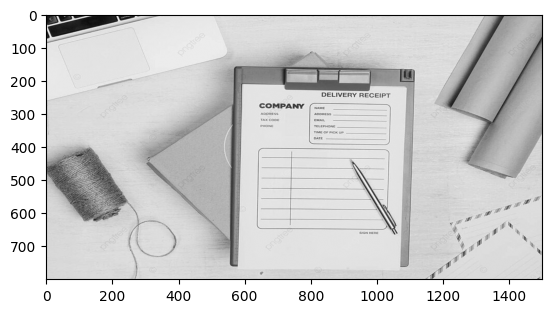

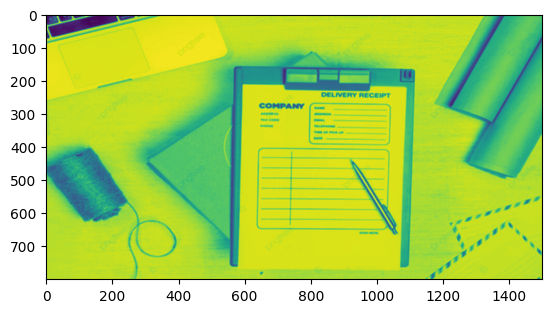

In [3]:
orig =img.copy()

gray =cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap ="gray")
plt.show()

blurred = cv2.GaussianBlur(gray, (5,5), 8)
plt.imshow(blurred)
plt.show()

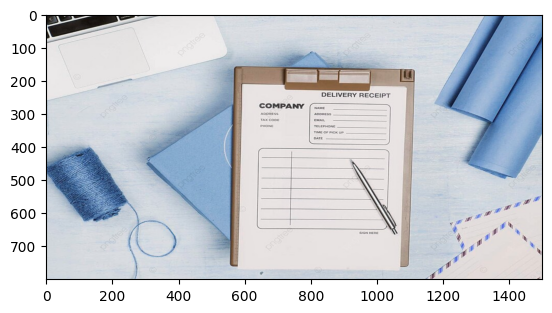

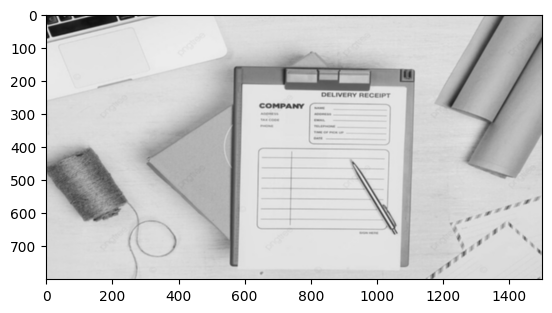

(800, 1500, 3)

In [4]:
regen =cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(regen)
plt.show()
regen.shape


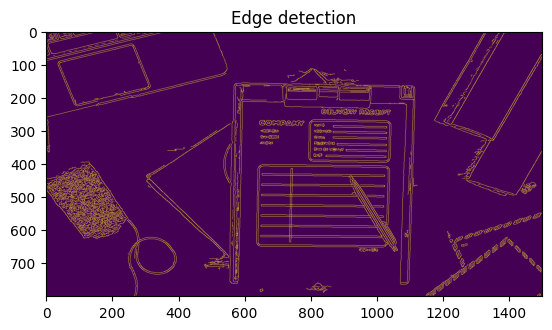

In [5]:
edge = cv2.Canny (blurred, 0,50)
orig_edge =edge.copy()

plt.imshow(orig_edge)
plt.title("Edge detection")
plt.show()

In [6]:
contours, _ =cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

contours = sorted(contours, reverse = True, key = cv2.contourArea)

1153


In [7]:
for c in contours:
    p = cv2.arcLength(c, True)
    approx =cv2.approxPolyDP(c, 0.01*p, True)
    
    if len(approx) == 4 :
        target =approx
        break

print(target.shape)

(4, 1, 2)


In [8]:
def reorder(h):
    h = h.reshape((4,2))
    hnew = np.zeros((4,2), dtype=np.float32)
    
    add = h.sum(axis=1)
    diff = np.diff(h, axis=1)
    
    hnew[0] = h[np.argmin(add)]     
    hnew[2] = h[np.argmax(add)]     
    hnew[1] = h[np.argmin(diff)]    
    hnew[3] = h[np.argmax(diff)]    
    
    return hnew

In [9]:
reorder = reorder(target)
print("*******")
print(reorder)

*******
[[ 801.  277.]
 [1034.  276.]
 [1035.  387.]
 [ 803.  388.]]


In [10]:
input_representation = reorder
output_map = np.float32([[0,0], [800,0], [800,800], [0,800]])

In [11]:
M = cv2.getPerspectiveTransform(input_representation, output_map)
ans = cv2.warpPerspective(orig, M, (800,800))


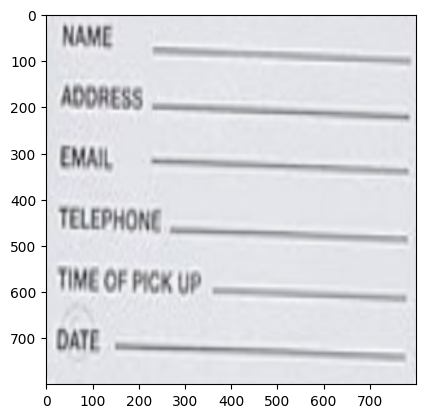

In [12]:
plt.imshow(cv2.cvtColor(ans, cv2.COLOR_BGR2RGB))
plt.show()

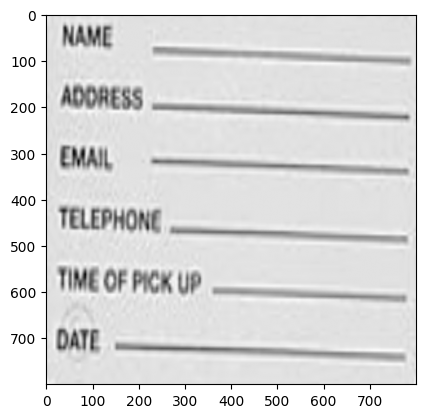

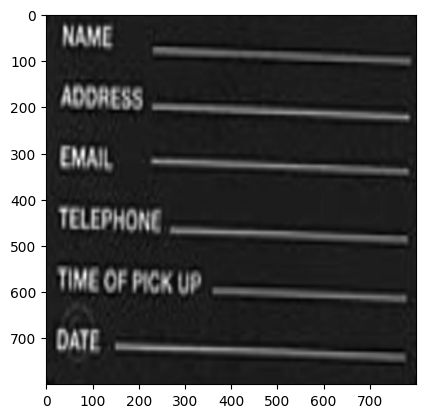

In [13]:
res = cv2.cvtColor(ans, cv2.COLOR_BGR2GRAY)
b_res = cv2.GaussianBlur(res, (3,3), 0)

plt.imshow(res, cmap="gray")
plt.show()

plt.imshow(b_res, cmap="binary")
plt.show()
